# Crystallization Database Connector Notebook
This notebook illustrates how to access the postgres database and perform some numberical analysis.

### Use
- goto top menu [Cell] --> [Run All]
    - The bottom illustrates a continuously updated plot that is receiving data from the crystallization module.
    - Note that the plot updates at the frequency that the crystallization module sends new data. Thus, the plot may not appear to be changing - be patient.

### Details
- The first cell imports the necessary modules to connect to the crystallization module and imports some auxillary modules to aid in calculating and plotting results.
- The second group of cells demonstrates how to connect to the PostgreSQL database for array data analytics.
- The third group of cells demonstrates how to connect to the InfluxDB database for scalar data analytics.

### Importing the needed modules

In [1]:
import numpy as np
import json
from datetime import datetime
from matplotlib import pyplot as plt
import psycopg2
from influxdb import InfluxDBClient

## PostgreSQL

### Connect to the database

In [71]:
try: 
    conn = psycopg2.connect("dbname='crystallization' user='postgres' host='postgres' password='postgrespassword'")
except:
    print("failed to connect")

### Get the data

In [72]:
try:
    cur = conn.cursor()
    cur.execute("""SELECT * FROM infrared""")
    rows = cur.fetchall()
except:
    conn.rollback()
    cur = conn.cursor()
    cur.execute("""SELECT * FROM infrared""")
    rows = cur.fetchall()

#### Filter the data for analysis

In [73]:
data = np.array([row[3] for row in rows if row[1]=="IR:1"])

### Make some calculations and plots

#### Plot one of the spectra

Text(0.5, 1.0, 'IR:1')

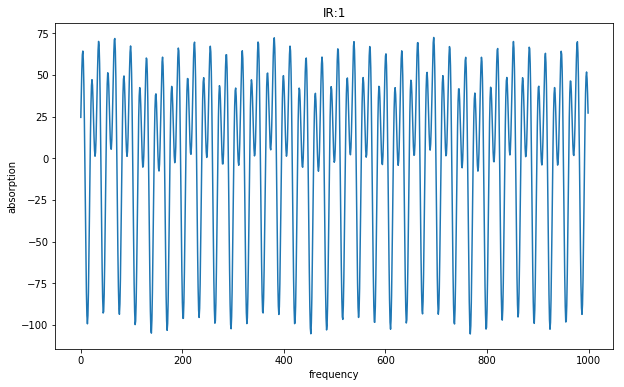

In [74]:
SPECTRA_NUMBER = 50
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data[SPECTRA_NUMBER])
ax.set_xlabel("frequency")
ax.set_ylabel("absorption")
ax.set_title("IR:1")

#### Plot a single wavelength

Text(0.5, 1.0, 'IR:1')

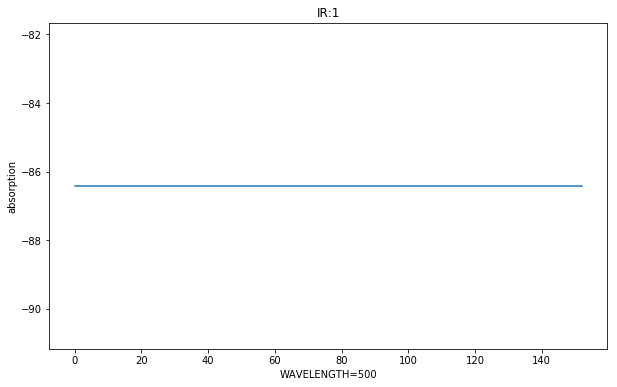

In [75]:
WAVELENGTH = 200
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data[:, WAVELENGTH])
ax.set_xlabel("WAVELENGTH=500")
ax.set_ylabel("absorption")
ax.set_title("IR:1")

## Influxdb

#### Connect to the database

In [39]:
client = InfluxDBClient(host='influx', port=8086)
client.switch_database('crystallization')
client.get_list_measurements()

[{'name': 'crystallization'}, {'name': 'equipment'}]

#### Get the data

In [46]:
results = client.query('SELECT "BATH:TEMP:PV" FROM "crystallization"."autogen"."crystallization" WHERE time > now() - 1m GROUP BY "EQUIPMENT"')

#### Filter and format the data

In [69]:
TAG = "TCU:1"
points = results.get_points(tags={"EQUIPMENT": TAG})
data = np.array([[p["time"], round(p["BATH:TEMP:PV"], 1)] for p in points])

#### Plot the data

Text(0.5, 1.0, 'TCU:1')

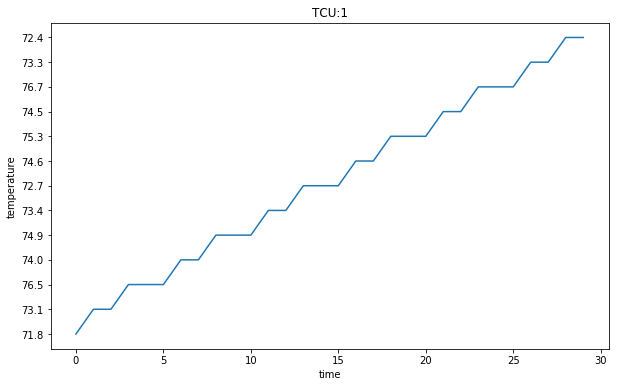

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data[:, 1])
ax.set_xlabel("time")
ax.set_ylabel("temperature")
ax.set_title("TCU:1")